# Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

### Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:
* Country code
* Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant&#39;s location
- Latitude: Latitude coordinate of the restaurant&#39;s location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies ��
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

## Problem statement : In this dataset predict 2 things –
* Average Cost for two
* Price range

### Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

# Downlaod Files:

* https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
* https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

In [119]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

#Import zscore
from scipy.stats import zscore

#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import SelectKbest and f_classif
from sklearn.feature_selection import SelectKBest, f_classif

#Import train test split
from sklearn.model_selection import train_test_split

#Import Smote
from imblearn.over_sampling import SMOTE

#Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report
import scikitplot as sktplt

#Import pickle
import pickle

#Importing Prediction Error and Residuals Plot
from yellowbrick.regressor import PredictionError, ResidualsPlot

#Import PCA
from sklearn.decomposition import PCA

In [2]:
#Reading zomato csv file
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding = 'latin-1')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Reading country excel file
df2 = pd.read_excel(r"C:\Users\singh\Downloads\Country-Code.xlsx")
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
#Marging two datasets
data = pd.merge(df1, df2, on = 'Country Code', how = 'left')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [5]:
#Checking rows and columns of the dataset
data.shape

(9551, 22)

* Dataset contains 9551 rows and 22 columns.

In [6]:
#Droping Duplicates
data.drop_duplicates()
data.shape

(9551, 22)

* No duplicate value present in this dataset.

In [7]:
#Checking unique values
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

# Exploratory Data Analysis

In [8]:
#Checking null values
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

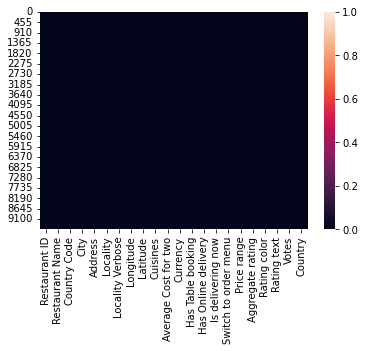

In [9]:
#Visualizing null values
sns.heatmap(data.isnull())
plt.show()

* No null value present in this dataset.

# Univariate Analysis

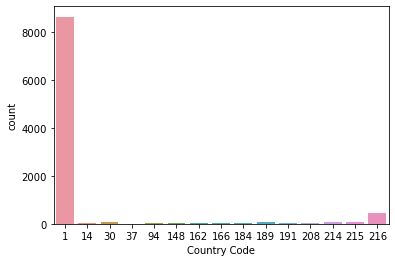

In [10]:
#Visualizing country_code
sns.countplot('Country Code', data = data)
plt.show()

* Country code 1 has the more count.

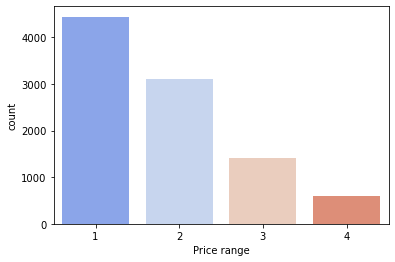

In [11]:
#Visualizing Price range
sns.countplot('Price range', data = data, palette = 'coolwarm')
plt.show()

* Price range 1 has the maximum number of data followed by 2.
* Price range are decreasing in order.

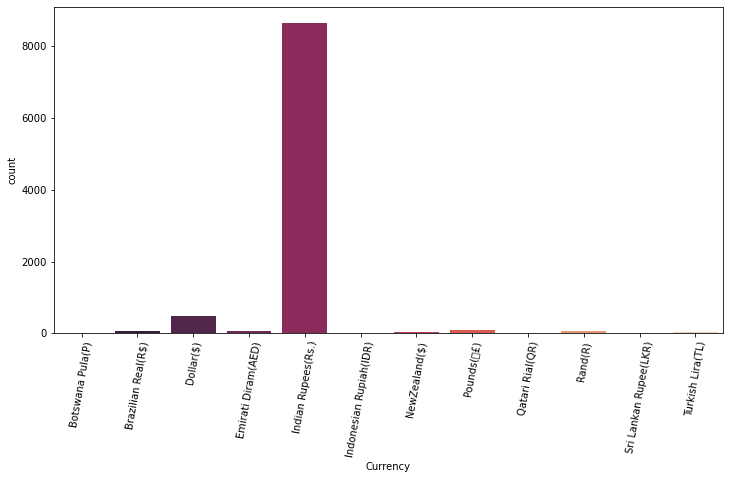

In [12]:
#Visualizing Currency
plt.figure(figsize = (12,6))
sns.countplot('Currency', data = data, palette = 'rocket')
plt.xticks(rotation = 80)
plt.show()

* We can see that the Indian Rupee is the most used currency in dataset.

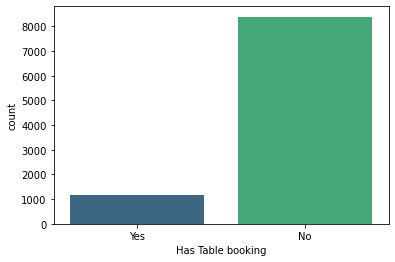

In [13]:
#Visualizing has table booking
sns.countplot('Has Table booking', data = data, palette = 'viridis')
plt.show()

* In few cases Table booking scenerio has been seen.

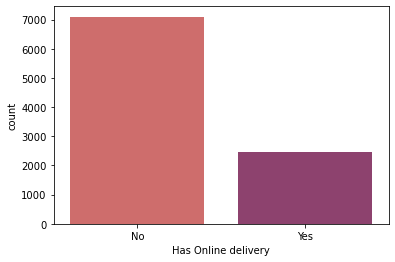

In [14]:
#Visualizing has online delivery
sns.countplot('Has Online delivery', data = data, palette = 'flare')
plt.show()

* No online delivery count more compared to yes online delivery option.

In [15]:
#Checking which countries has online delivery option
a = data[data['Has Online delivery'] == 'Yes'].Country.value_counts()

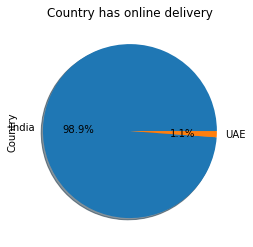

In [16]:
#Visualizing percentage to online delivery option by country
a.plot.pie(autopct = '%1.1f%%', shadow = True)
plt.title('Country has online delivery')
plt.show()

* India has 98.9% online delivery option and in UAE it's only 1.1%.
* Rest of the countries does not have online delivery option available for zomato.

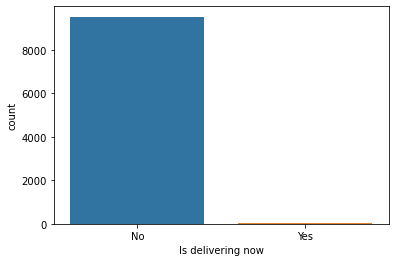

In [17]:
#Visualizing is delivering now
sns.countplot('Is delivering now', data = data)
plt.show()

* Most of places does not have deliver now option available.

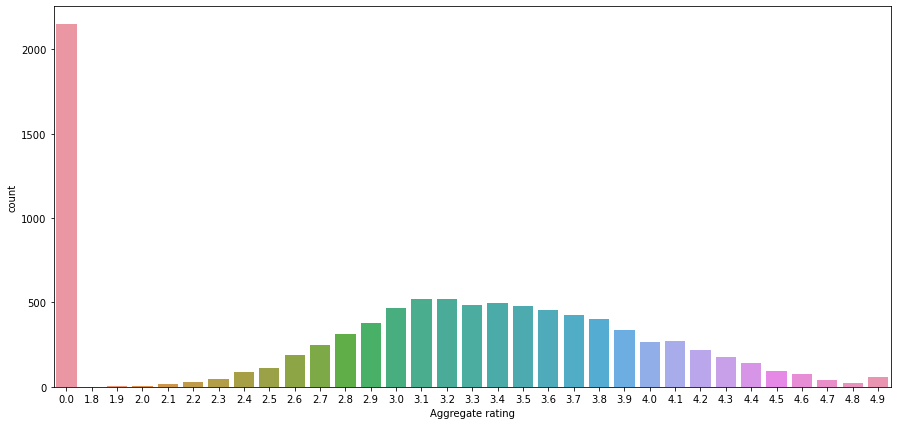

In [18]:
#Visualing Aggregate rating
plt.figure(figsize = (15,7))
sns.countplot('Aggregate rating', data = data)
plt.show()

* Most of the customers have given 0 as aggregate rating.
* 3.1 and 3.2 are most given ratings.

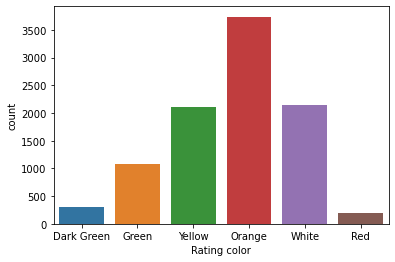

In [19]:
#Visualing rating color
sns.countplot('Rating color', data = data)
plt.show()

* Orange color is most used to for rating followed by Yellow and White.

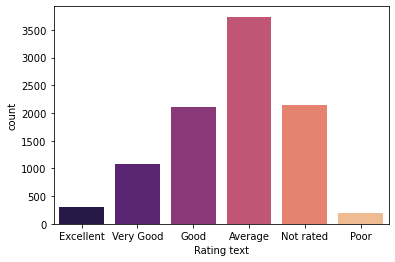

In [20]:
#Visualing rating text
sns.countplot('Rating text', data = data, palette = 'magma')
plt.show()

* Most of the customers have rated zomato delivery as Average.

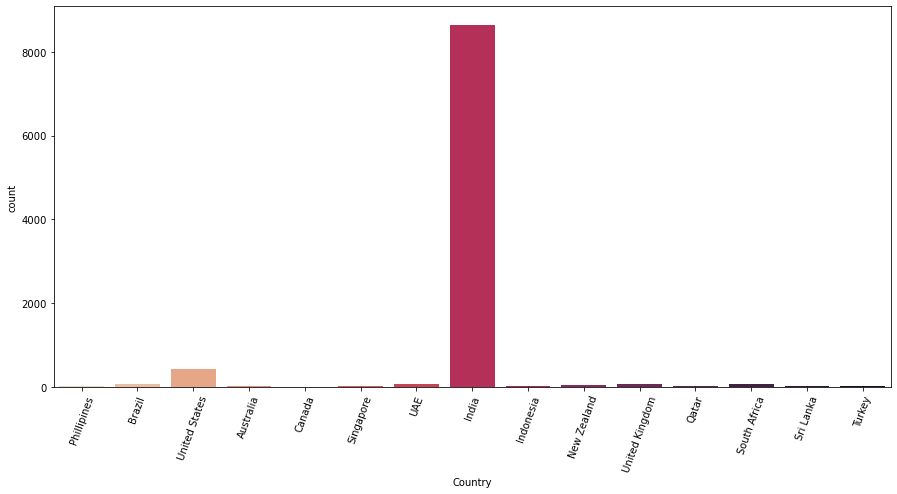

In [21]:
#Visualing Country
plt.figure(figsize = (15,7))
sns.countplot('Country', data = data, palette = 'rocket_r')
plt.xticks(rotation = 70)
plt.show()

* Zomato is mostlty functioned in India followed by United States.

In [22]:
city_values = data.City.value_counts().values
city_lables = data.City.value_counts().index

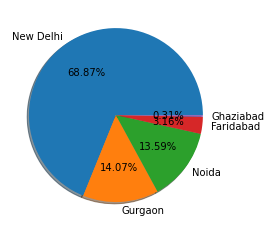

In [23]:
#Visualizing City
plt.pie(city_values[:5], labels = city_lables[:5], autopct = '%1.2f%%', shadow = True)
plt.show()

* 68.87% zomato works in Delhi followed by Gurgaon and Noida.

In [24]:
#Finding top 10 cuisine
cuisine_val = data.Cuisines.value_counts().values
cuisine_label = data.Cuisines.value_counts().index

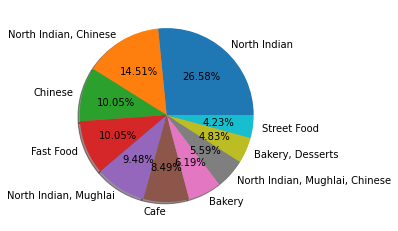

In [25]:
#Visualizing cuisines
plt.pie(cuisine_val[:10], labels = cuisine_label[:10], autopct = '%1.2f%%', shadow = True)
plt.show()

* We can see 26.58% customers like to eat North indian cuisine followed by Chinese.

In [26]:
#Find top 10 location
val = data.Locality.value_counts().values
label = data.Locality.value_counts().index

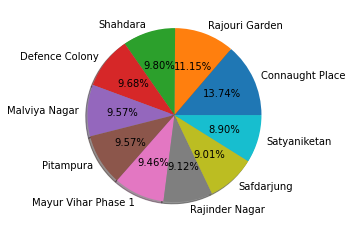

In [27]:
#Visualizing top 10 location
plt.pie(val[:10], labels = label[:10], autopct = '%1.2f%%', shadow = True)
plt.show()

* These are the top 10 locations where most of the zomato allines resturants are located.

# Bivariate Analysis

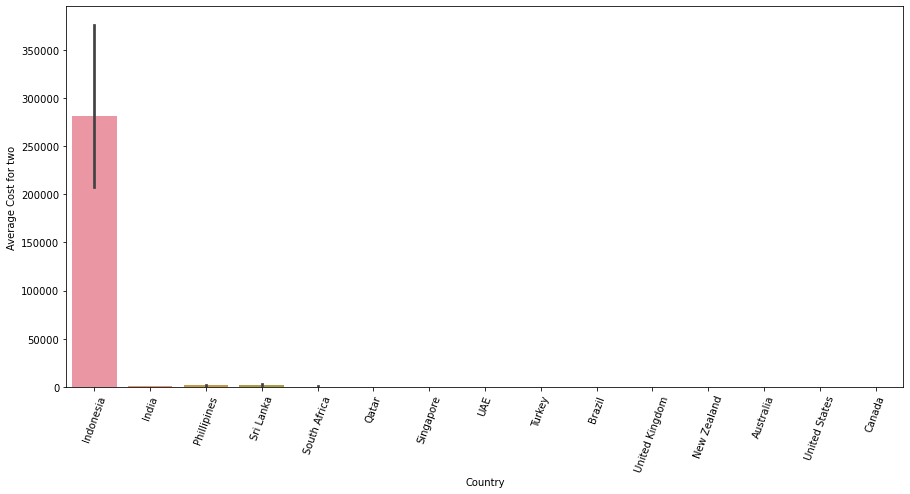

In [28]:
#Visualizing country by average cost for two
plt.figure(figsize = (15,7))
cost = data.sort_values(by = 'Average Cost for two', ascending  = False)
sns.barplot(x = 'Country', y = 'Average Cost for two', data = cost)
plt.xticks(rotation = 70)
plt.show()

* Indonesia has high food cost than other countries.

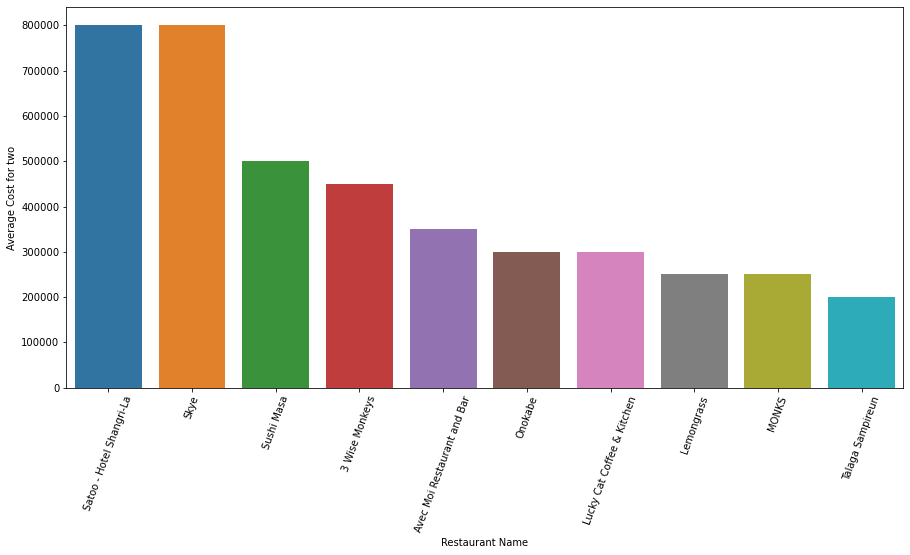

In [29]:
#Visualizing resturant name by average cost for two
plt.figure(figsize = (15,7))
cost = data.sort_values(by = 'Average Cost for two', ascending  = False).iloc[0:10]
sns.barplot(x = 'Restaurant Name', y = 'Average Cost for two', data = cost)
plt.xticks(rotation = 70)
plt.show()

*Satoo hotel has high food cost for two followed by skye.

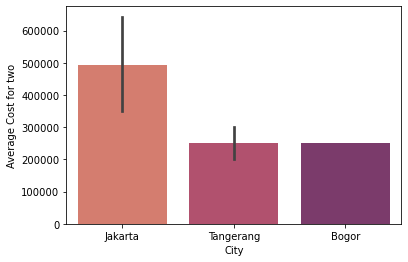

In [30]:
#Visualizing city name by average cost for two
cost = data.sort_values(by = 'Average Cost for two', ascending  = False).iloc[0:10]
sns.barplot(x = 'City', y = 'Average Cost for two', data = cost, palette = 'flare')
plt.show()

* Average cost two people for food is the highest in Jakarta.

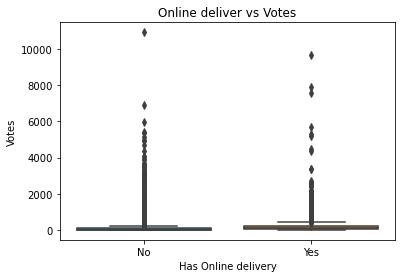

In [31]:
#Visualizing online delivery by votes
sns.boxplot('Has Online delivery', 'Votes', data = data)
plt.title('Online deliver vs Votes')
plt.show()

* Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.

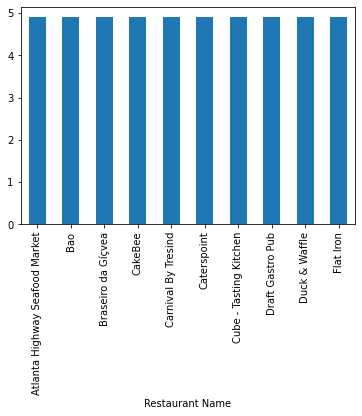

In [32]:
#Visualizing Restaurant name by Aggregate rating
data.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10).plot.bar()
plt.show()

* These are the top 10 restaurant name where most of the coustomers gives good aggregate rating.
* In which Atlanta is top among the others.

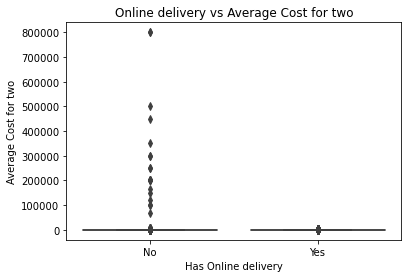

In [33]:
#Visualizing online delivery by Average cost for two
sns.boxplot('Has Online delivery', 'Average Cost for two', data = data)
plt.title('Online delivery vs Average Cost for two')
plt.show()

* Average cost for two people has not affected by online delivery system.

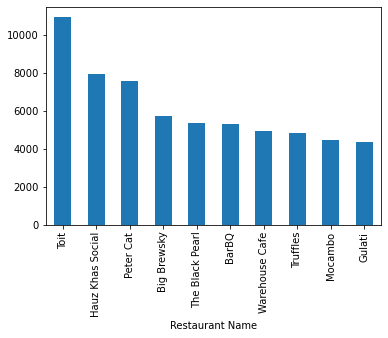

In [34]:
#Visualizing Restaurant name by votes
data.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot.bar()
plt.show()

* In the above plot we can see top 10 restaurants basis on the customer votes.
* Toit has the highest customer votes.

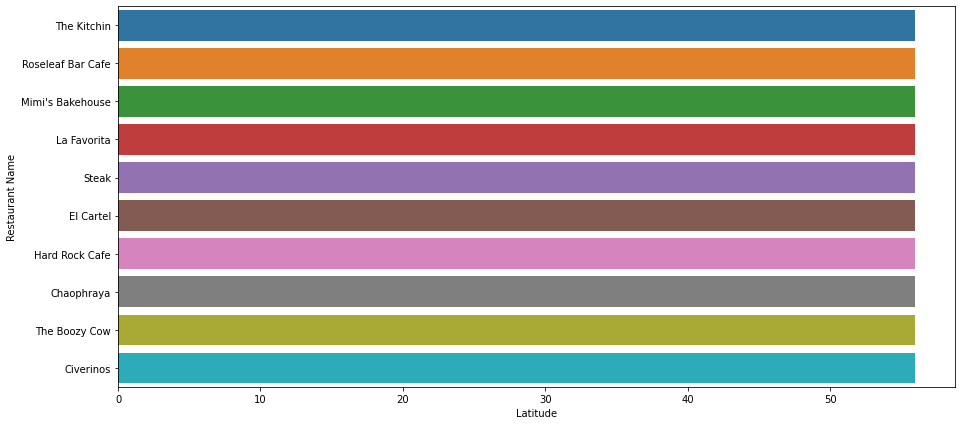

In [35]:
#Visualizing resturant name by Latitud
plt.figure(figsize = (15,7))
cost = data.sort_values(by = 'Latitude', ascending  = False).iloc[0:10,:]
sns.barplot(y = 'Restaurant Name', x = 'Latitude', data = cost)
plt.show()

* We can see, by latitude The Kitchen has highest latitude. It mean at high latitude criteria, it is top.
* We can see, all top 10 restaurant name, where they are generaly lies in nearly same latitude.

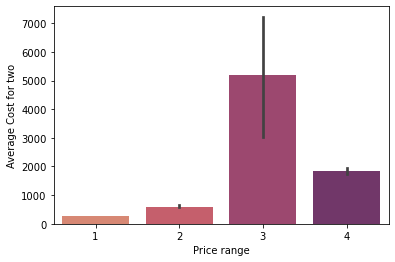

In [36]:
#Visualizing Price range by Average Cost for two
sns.barplot(x = 'Price range', y = 'Average Cost for two', data = data, palette = 'flare')
plt.show()

* Many restaurants have high average price range as the highest price range is 3.

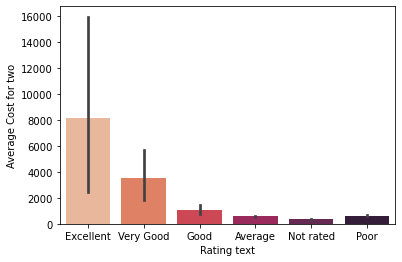

In [37]:
#Visualizing Rating text by Average Cost for two
sns.barplot(x = 'Rating text', y = 'Average Cost for two', data = data, palette = 'rocket_r')
plt.show()

* Restaurants with Excellent rating has highest average cost for two.

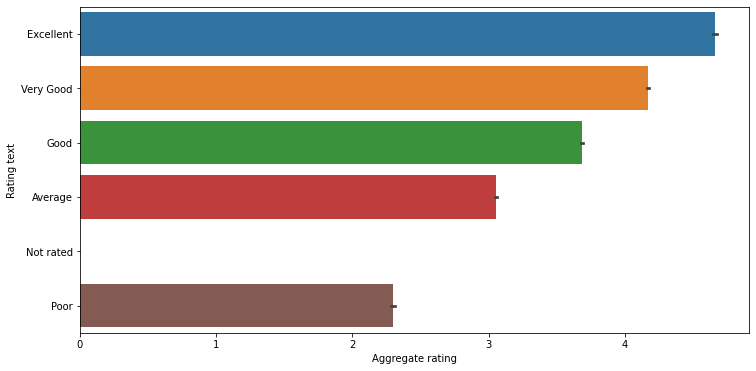

In [38]:
#Visualizing Rating text by Aggregate rating
plt.figure(figsize = (12,6))
sns.barplot(x = 'Aggregate rating', y = 'Rating text', data = data)
plt.show()

* We can see, Many restaurant are having Excellent as rating text and their Aggregate rating also high it mean more than 4.5.

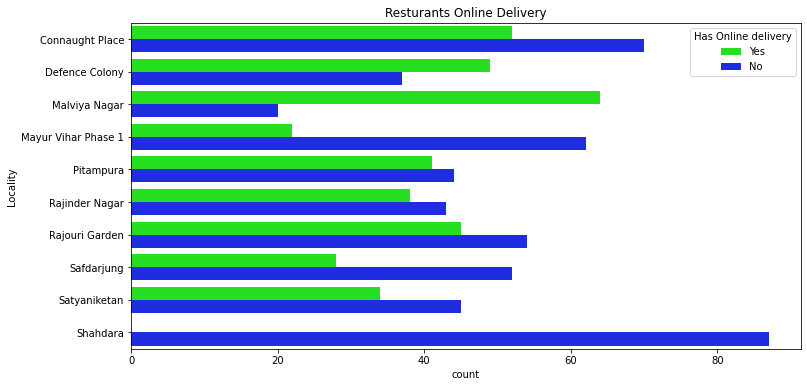

In [39]:
#Find the country names who has given 0 rating
Delhi = data[(data.City == 'New Delhi')]
top_locality = Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(y = "Locality", hue = "Has Online delivery", data = Delhi[Delhi.Locality.isin(top_locality.index)], palette = 'hsv')
plt.title('Resturants Online Delivery')
plt.show()

* Most of the places does not have online delivery option.
* Malviya Nagar has availed the highest online delivery option.

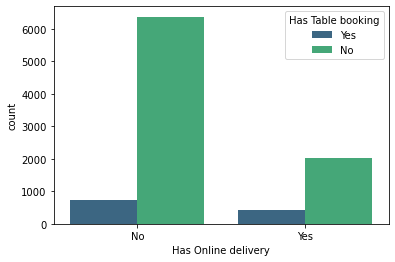

In [40]:
#Visualizing Has online delivery option and Has table booking
sns.countplot('Has Online delivery', hue = 'Has Table booking', data = data, palette = 'viridis')
plt.show()

* We can see, those are not providing online delivery they also have less table booking but it doe not have any impact on business because most of the restaurant has not provided online delivery.

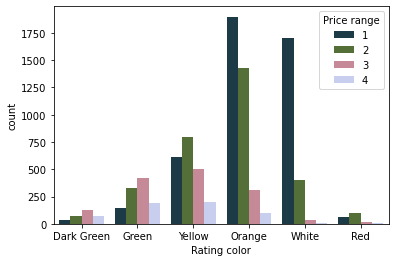

In [41]:
#Visualizing rating color and price range
sns.countplot('Rating color', hue = 'Price range', data = data, palette = 'cubehelix')
plt.show()

* We can see, As per price range the rating color has change. In Which the Orange rating color has more count than others.

# Multivariate Analysis

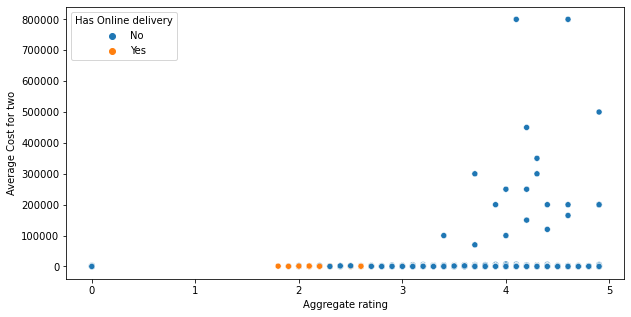

In [42]:
#Visualizing Aggregate rating and average cost for two by Has online delivery
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Aggregate rating',y = 'Average Cost for two',hue = 'Has Online delivery',data = data)
plt.show()

* We can see, very few restaurant has accepted the online delivery it mean online oders.
* Here those restaurant not accepted online odered they also have good rating.

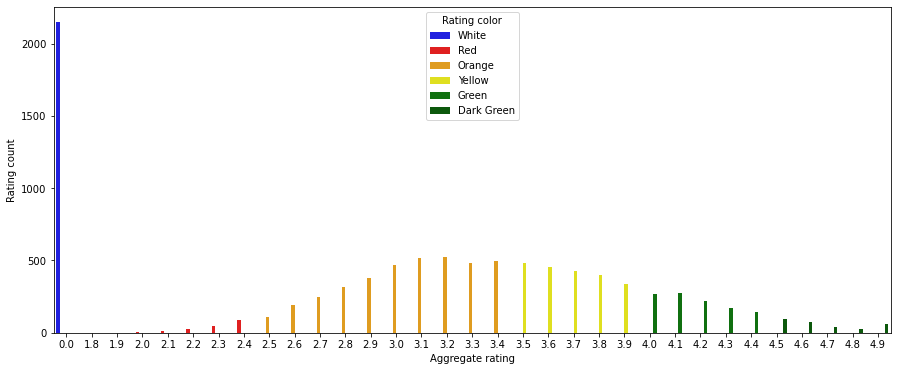

In [43]:
#Visualizing Aggregate rating and rating count by rating color
plt.figure(figsize = (15,6))
rating = data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = {0:'Rating count'})
sns.barplot(x = 'Aggregate rating',y = 'Rating count',hue = 'Rating color',data = rating, palette = ['blue','red','orange','yellow','green','darkgreen'])
plt.show()

* Not Rated count is very high.
* Maximum number of rating are between 2.5 to 3.4.

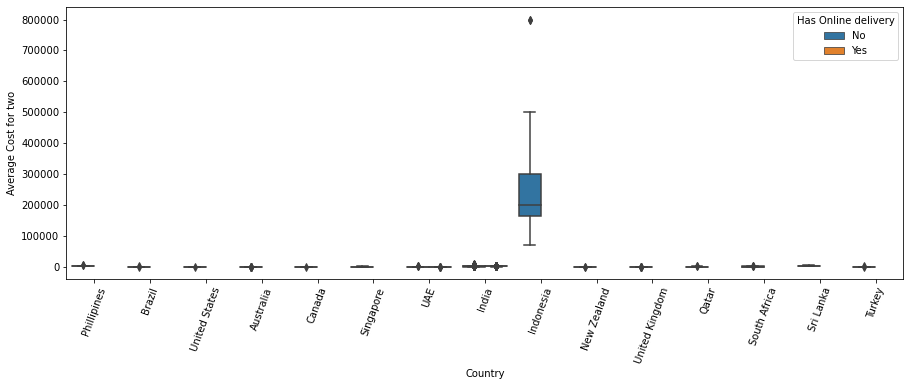

In [44]:
#Visualizing Country and Average cost for two by Has online delivery
plt.figure(figsize = (15,5))
sns.boxplot(x = "Country", y = "Average Cost for two", hue = "Has Online delivery",data = data)
plt.xticks(rotation = 70)
plt.show()

* We can see, Indonesia has high average cost for two and they also not avail online delivery. It means they do not have online order system.
* Rest of all are having low average cost for two and they may not have any online system or may have online delivery.

# Encoding

In [45]:
#Droping unnecessary columns
data.drop(columns = ['Restaurant ID', 'Locality Verbose'], axis = 1, inplace = True)

In [46]:
le = LabelEncoder()

In [47]:
for col in data[data.columns[data.dtypes == 'object']]:
    data[col] = le.fit_transform(data[col])

In [48]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


* All columns are in numeric values now.

In [49]:
#Checking stats of the dataset
data.describe()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128468,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866515,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


* Difference between 75% and max in Average Cost for two, Evaporation and Votes is high, these columns are indicating presence of outliers.
* In some features mean to Standard deviation is close.
* In Average cost for two has mean and Standard deviation difference is more.

# Correlation

In [50]:
#Checking correlation between features
data.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Is delivering now      -0.001862
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

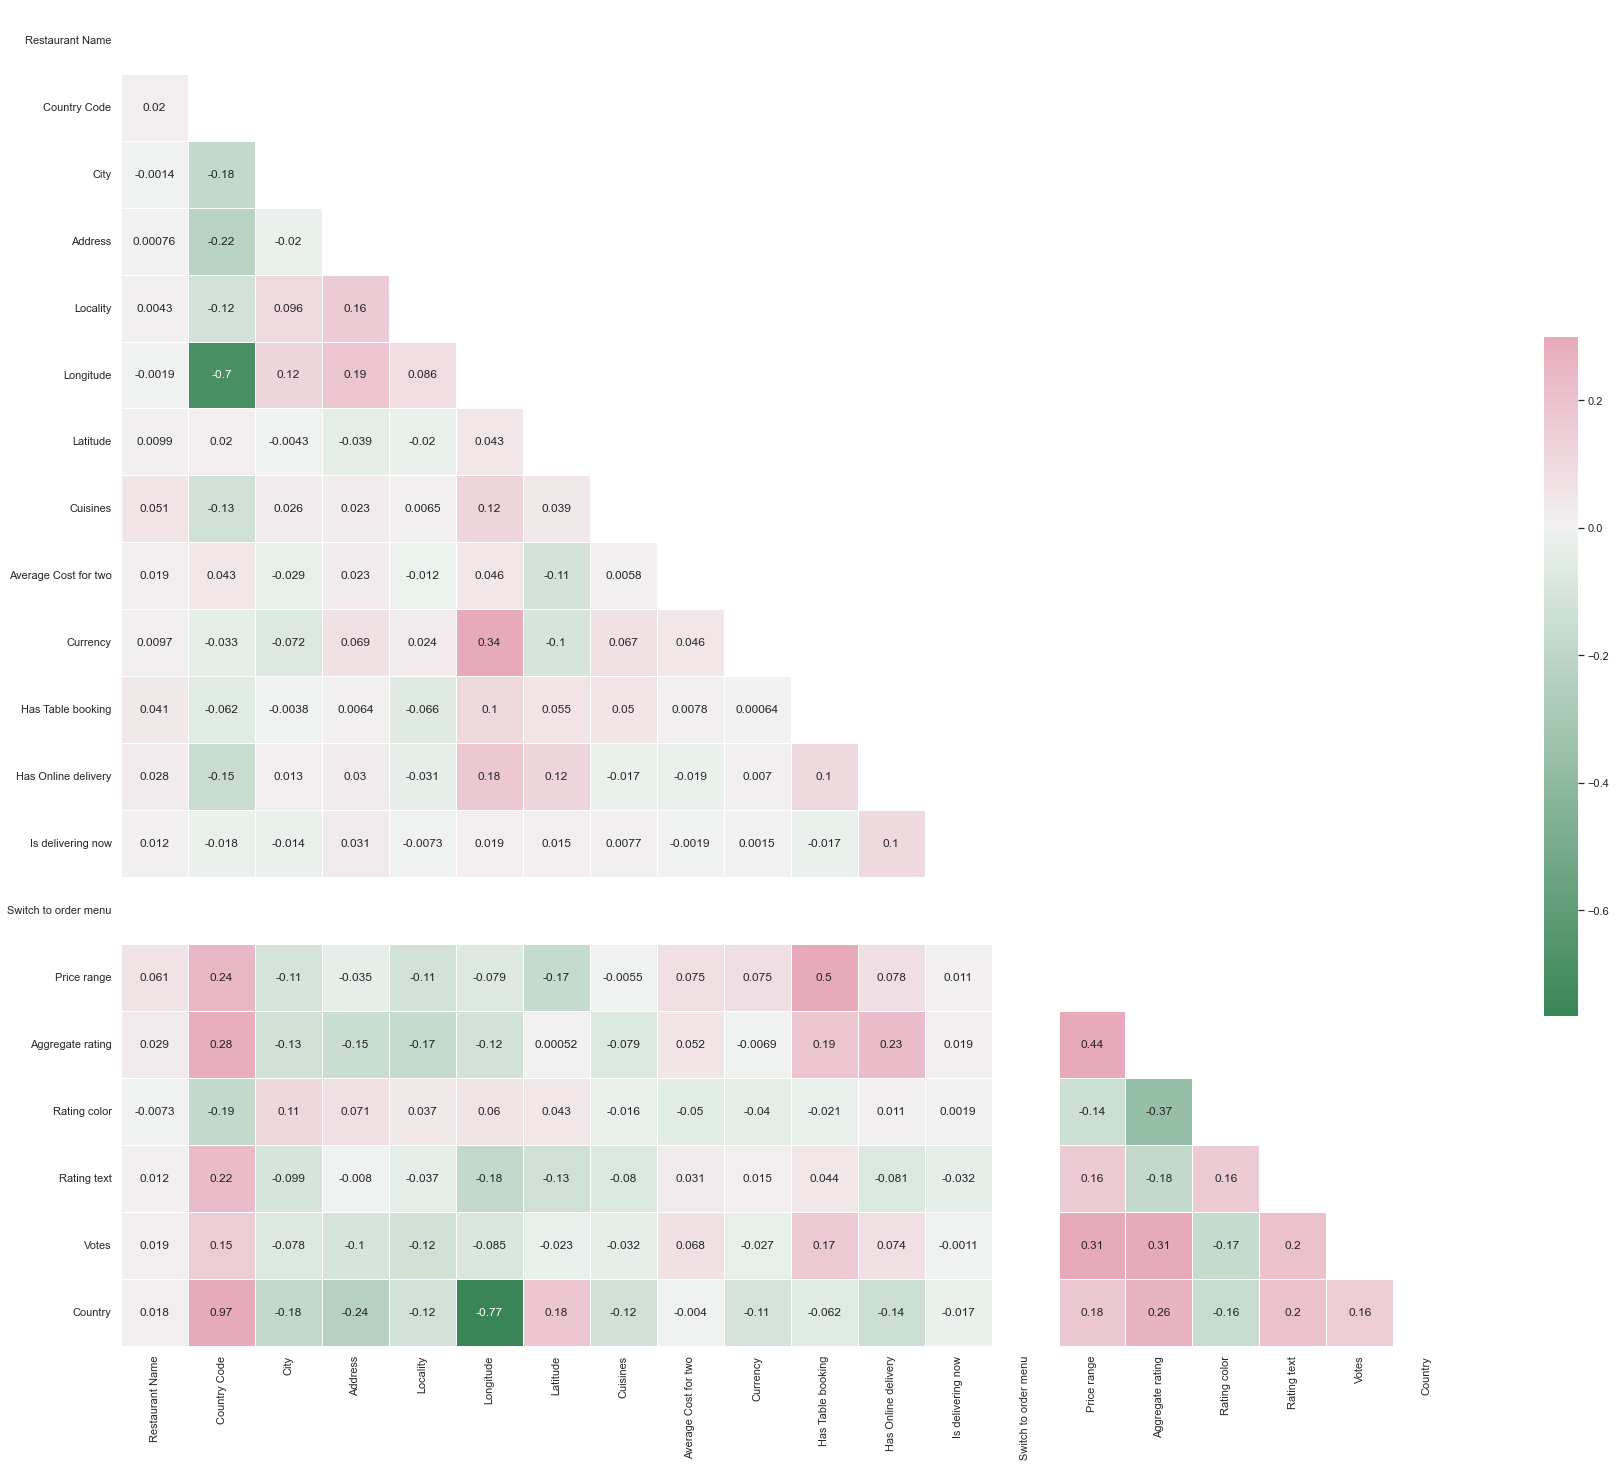

In [51]:
#Checking feature correlation using heatmap
sns.set_theme(style = 'white')
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (30,25))
cmap = sns.diverging_palette(500,1, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True)

plt.show()

* Price range and Votes have positive correlation with Average cost for two.
* Few features are also correlated with each other will deal with it later.

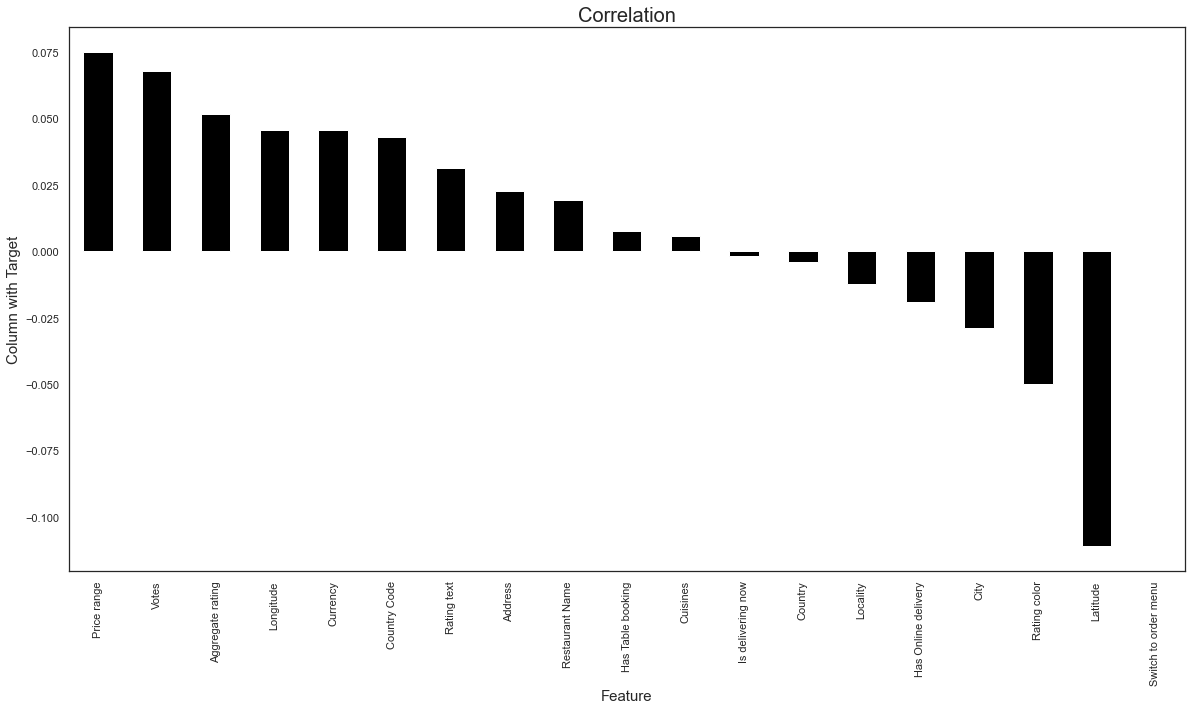

In [52]:
#Visualizing correlation
plt.figure(figsize = (20,10))
data.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind = 'bar', color = 'black')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Column with Target', fontsize = 15)
plt.title('Correlation', fontsize = 20)
plt.show()

* From above plot I can observe that Price range, votes and Aggregating rating has high positive correlation with Average Cost for two.
* Switch to oder menu, Latitude and Rating color has strong negative correlation with Average Cost for two.

# Skewness

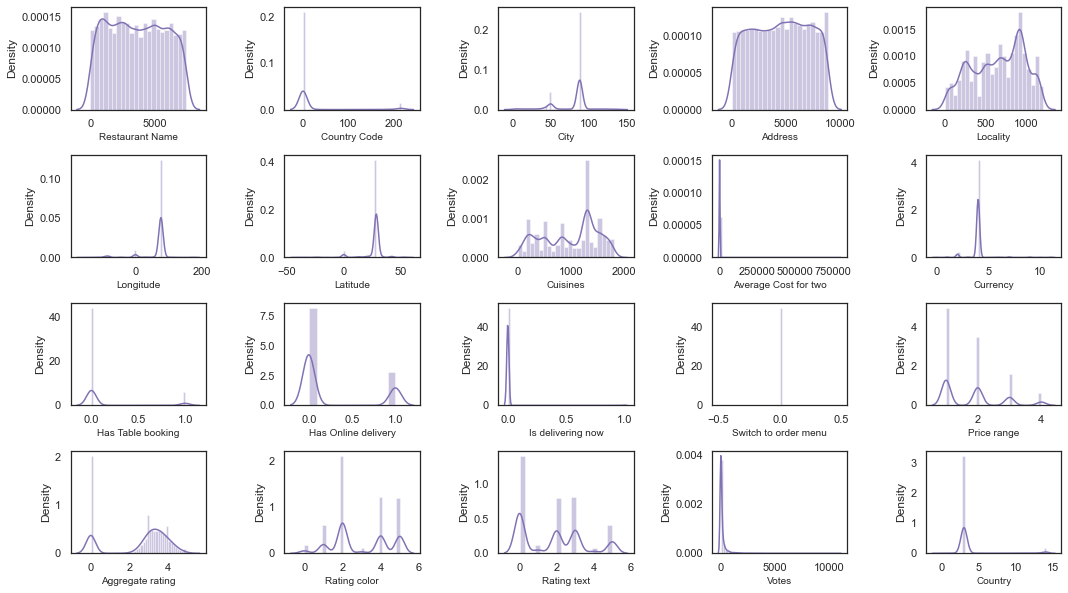

In [53]:
plt.figure(figsize = (15,10))
plotnumber = 1

for i in data:
    plt.subplot(5,5, plotnumber)
    sns.distplot(data[i], color = 'm')
    plt.xlabel(i, fontsize = 10)
    plotnumber += 1    
    plt.tight_layout()

* All features have some skewness present.

In [54]:
#Checking skewness of the dataset
data.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

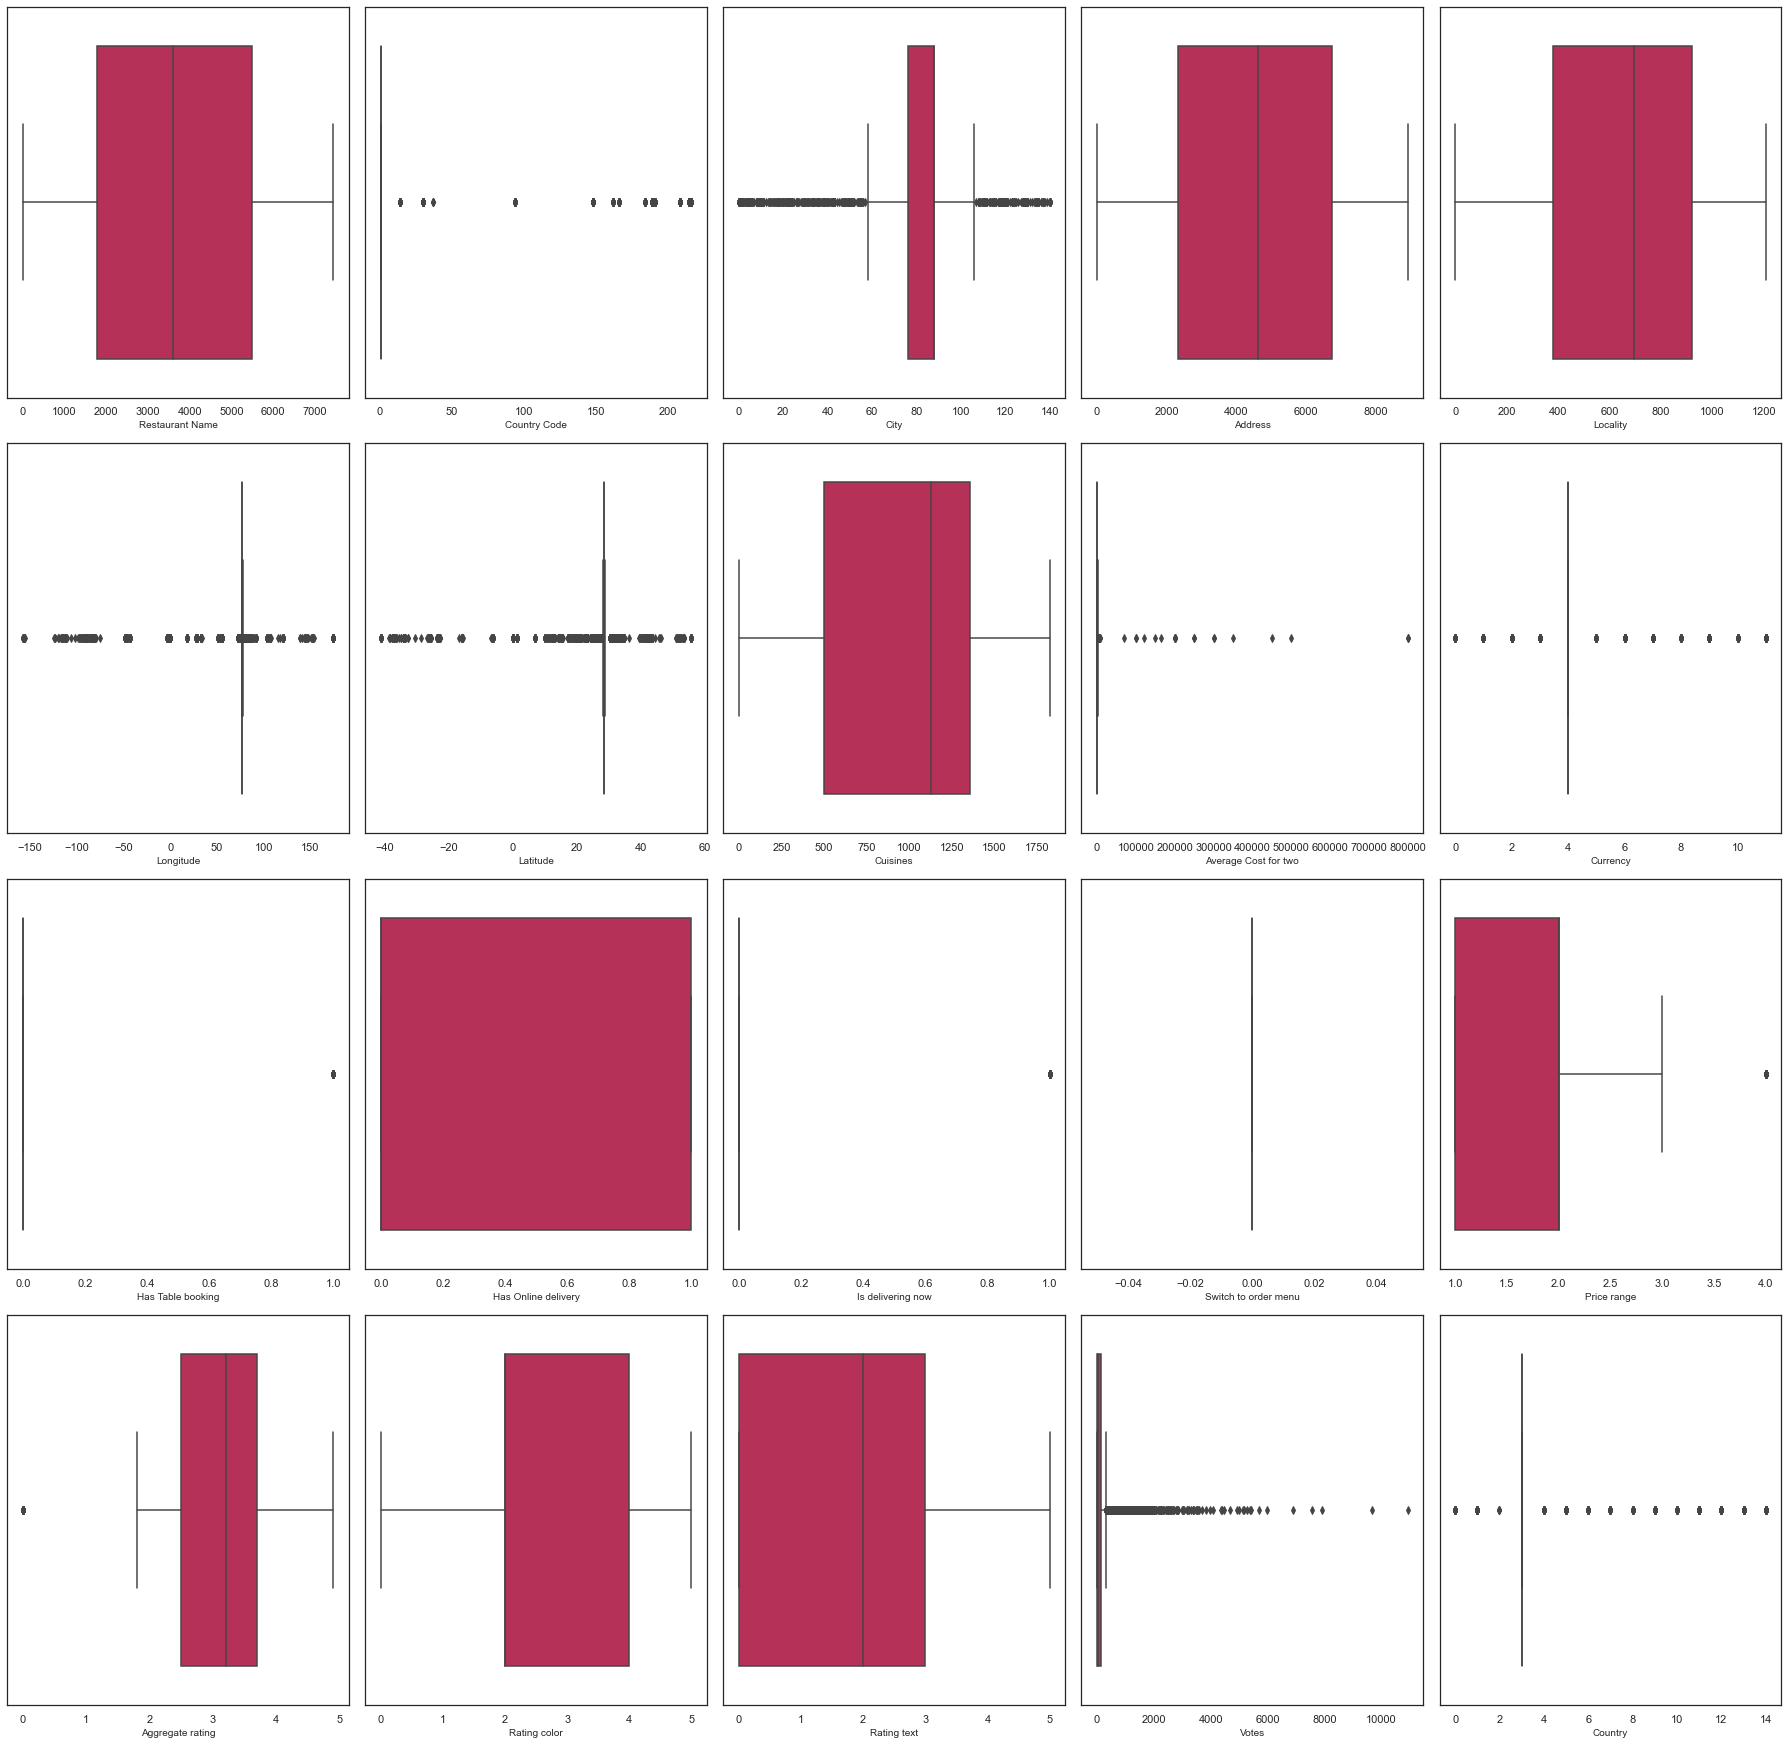

In [55]:
plt.figure(figsize = (25,30))
plotnumber = 1

for i in data:
    plt.subplot(5,5, plotnumber)
    sns.boxplot(data[i], palette = 'rocket')
    plt.xlabel(i, fontsize = 10)
    plotnumber += 1    
    plt.tight_layout()

* Restaurant Name, Address, Rating color, Rating text, Has online delivery, Cuisine and locality doesn't have outliers.
* Some features have outliers but they are categorical columns.

In [56]:
#Removing skewness using zscore
z_score = zscore(data[['Average Cost for two', 'Votes']])
abs_zscore = np.abs(z_score)

entry = (abs_zscore < 3).all(axis = 1)
df = data[entry]

In [57]:
#Printing old and new datset shape
print('Old Data Shape', data.shape)
print('New Data Shape', df.shape)

Old Data Shape (9551, 20)
New Data Shape (9362, 20)


In [58]:
#Printing data loss after removing skewness
data_loss = (9551 - 9362)/9551 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  1.978850382158936


* 1.9% data has been remove while removing skewness using zscore.

In [59]:
df.skew()

Restaurant Name          0.047817
Country Code             3.073330
City                    -1.208515
Address                 -0.046651
Locality                -0.267053
Longitude               -2.804979
Latitude                -3.124155
Cuisines                -0.305801
Average Cost for two     3.619524
Currency                 2.885278
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Switch to order menu     0.000000
Price range              0.933571
Aggregate rating        -0.940907
Rating color             0.047268
Rating text              0.434638
Votes                    3.216882
Country                  3.326986
dtype: float64

* Still have some skewness present will try to reduce it using power tarnsformer in further process.

# Deviding dataset into X and Y variable

In [60]:
x = df.drop('Average Cost for two', axis = 1)
y = df['Average Cost for two']

In [61]:
x.shape

(9362, 19)

In [62]:
y.shape

(9362,)

# Standardization

In [63]:
#Scaling x dataset using standard scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [64]:
x.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.046028,2.546808,-0.234817,1.608777,-1.556831,1.377696,-1.034966,-0.135805,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.359625,1.429678,-2.022410,-0.451916,0.977930,0.859957
1,-0.223104,2.546808,-0.234817,0.584353,-0.216997,1.377371,-1.036033,0.235153,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.359625,1.231562,-2.022410,-0.451916,2.321890,0.859957
2,-0.352063,2.546808,-0.148206,0.050327,-1.121862,1.378405,-1.033513,1.322778,-4.331413,2.746265,-0.586149,-0.060373,0.0,2.476579,1.165524,-1.343779,1.932324,0.764449,0.859957
3,0.493647,2.546808,-0.148206,1.610725,0.637068,1.378396,-1.033157,0.264286,-4.331413,-0.364131,-0.586149,-0.060373,0.0,2.476579,1.495717,-2.022410,-0.451916,1.225374,0.859957
4,0.874917,2.546808,-0.148206,1.610335,0.637068,1.378421,-1.033236,0.256517,-4.331413,2.746265,-0.586149,-0.060373,0.0,2.476579,1.429678,-2.022410,-0.451916,0.565523,0.859957


# Multicollinearity

In [65]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.008700,Restaurant Name
1,48.278786,Country Code
2,1.081831,City
3,1.106130,Address
4,1.068078,Locality
5,5.031289,Longitude
6,3.037873,Latitude
7,1.043922,Cuisines
8,1.294013,Currency
9,1.482431,Has Table booking


* If VIF > 10, It means multicollinearity is present.
* MultiCollinearity exists in Country Code, Switch to order menu and Country Based on ANOVA F scores.

In [66]:
#Droping Country and Switch to order menu
x = x.drop(columns = ['Country', 'Switch to order menu'], axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.008695,Restaurant Name
1,2.738298,Country Code
2,1.077355,City
3,1.099988,Address
4,1.067096,Locality
5,2.556426,Longitude
6,1.152967,Latitude
7,1.043760,Cuisines
8,1.288302,Currency
9,1.481057,Has Table booking


* Multicollinearity problem has been resolved.

# Selecting Kbest Features

In [67]:
#Selecting feature using kbest
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [68]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                Feature       Score
12          Price range  418.202989
1          Country Code  272.264460
5             Longitude  142.353602
9     Has Table booking   80.635590
8              Currency   29.041295
16                Votes   25.818126
13     Aggregate rating   22.275744
6              Latitude   15.805349
10  Has Online delivery   11.752010
3               Address    7.795143
15          Rating text    7.144425
2                  City    4.863372
14         Rating color    4.044857
7              Cuisines    3.786064
4              Locality    3.379470
11    Is delivering now    2.063234
0       Restaurant Name    1.358221


In [69]:
#Selecting best features based on their scores
x = x.drop(columns = ['Restaurant Name','Is delivering now']).copy()

# Will remove skewness using Power Transformer

In [70]:
#Checking skewness
x.skew()

Country Code           3.073330
City                  -1.208515
Address               -0.046651
Locality              -0.267053
Longitude             -2.804979
Latitude              -3.124155
Cuisines              -0.305801
Currency               2.885278
Has Table booking      2.382516
Has Online delivery    1.120081
Price range            0.933571
Aggregate rating      -0.940907
Rating color           0.047268
Rating text            0.434638
Votes                  3.216882
dtype: float64

In [71]:
#Will remove remaining skewness by using Power Tranform
PT = PowerTransformer(method = 'yeo-johnson')
transform = PT.fit_transform(x)

In [72]:
x = pd.DataFrame(transform)
x.columns = x.columns

In [73]:
x.skew()

0     2.836312
1     0.532634
2    -0.007737
3    -0.037826
4     2.219168
5     1.349365
6    -0.060454
7    -0.164795
8     2.382516
9     1.120081
10    0.269597
11   -0.080241
12   -0.022619
13    0.147742
14    0.620989
dtype: float64

In [74]:
#Scaling x again
x = scaler.fit_transform(x)
x

array([[ 3.17991332, -0.45791111,  1.63425957, ..., -2.12130967,
        -0.36190373,  1.60852326],
       [ 3.17991332, -0.45791111,  0.57431718, ..., -2.12130967,
        -0.36190373,  1.85982752],
       [ 3.17991332, -0.37255884,  0.03345568, ..., -1.37386837,
         1.70903651,  1.52323367],
       ...,
       [ 3.1802086 ,  4.75917515,  0.53891262, ...,  1.3436892 ,
         0.27815177,  1.88948955],
       [ 3.1802086 ,  4.75917515,  0.53931022, ..., -1.37386837,
         1.70903651,  1.95421611],
       [ 3.1802086 ,  4.75917515, -0.13228299, ..., -1.37386837,
         1.70903651,  1.85982752]])

# Model Building (Regression)

In [76]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  2 The model performance very well
At random state:  2
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  8 The model performance very well
At random state:  8
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  23 The model performance very well
At random state:  23
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  26 The model performance very well
At random state:  26
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  31 The model performance very well
At random state:  31
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  43 The model performance very well
At random state:  43
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXX

In [77]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 94, test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [78]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [80]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, x, y, cv = 10).mean())
    print('X' * 50, '\n\n')

MAE of  LinearRegression() model 205.75040933710568
MSE of LinearRegression() model 147870.77451260353
RMSE of LinearRegression() model 384.5396917258393
Training R2 Score of LinearRegression() model 61.08557488705672
Test R2 Score of LinearRegression() model 60.80147602014353
cross Validation score of  LinearRegression()  is  -0.37362774004006716
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Ridge() model 205.73801161343332
MSE of Ridge() model 147872.38212282953
RMSE of Ridge() model 384.54178202482694
Training R2 Score of Ridge() model 61.085573540531
Test R2 Score of Ridge() model 60.8010498646155
cross Validation score of  Ridge()  is  -0.35434734676416596
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Lasso() model 205.10893732175472
MSE of Lasso() model 148026.82848477035
RMSE of Lasso() model 384.74254831610494
Training R2 Score of Lasso() model 61.08067128343744
Test R2 Score of Lasso() model 60.760108242161046
cross Validation score of  Lasso() 

MAE of  AdaBoostRegressor() model 193.77622109945824
MSE of AdaBoostRegressor() model 90258.95021904132
RMSE of AdaBoostRegressor() model 300.43127370339016
Training R2 Score of AdaBoostRegressor() model 75.60308422513906
Test R2 Score of AdaBoostRegressor() model 76.07358427505764
cross Validation score of  AdaBoostRegressor()  is  0.4912996031694707
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  GradientBoostingRegressor() model 112.24141450288589
MSE of GradientBoostingRegressor() model 38907.09561293999
RMSE of GradientBoostingRegressor() model 197.24881650580312
Training R2 Score of GradientBoostingRegressor() model 88.89599859964991
Test R2 Score of GradientBoostingRegressor() model 89.68626001049039
cross Validation score of  GradientBoostingRegressor()  is  0.7085701006465703
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 




* XGBoost Regressor has given the best performance till now with 98% training score, 91% testing score and 76% cross validation score.

# Hypertune XGBoost Regressor

In [89]:
#Let's tune the parameters using GridsearchCv
params = {'n_estimators': [100, 200, 300],
        'gamma': [2.0, 3.0, 4.0],
         'max_depth': [4 , 6, 8],
         'learning_rate':[0.01, 0.05, 0.1]
        }

GCV = GridSearchCV(XGB_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_ca...t=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [2.0, 3.0, 4.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [90]:
GCV.best_params_

{'gamma': 3.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}

In [91]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.905193943534983

* I have tuned the parameters for XGBoost model but the score is not satisfatory hence will save the original model.

# Saving Regression Model

In [95]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(XGB_model, open('Average', 'wb'))

In [96]:
#Loading saved model
loaded_model = pickle.load(open('Average','rb'))

In [97]:
#Prediction using saved model
average = loaded_model.predict(x_test)
average

array([895.3327 , 175.82109, 685.10297, ..., 626.5819 , 562.3772 ,
       404.5269 ], dtype=float32)

In [98]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Average Cost': y_test, 'Predicted Average Cost': average})
DF.head()

,Actual Average Cost,Predicted Average Cost
2431,1000,895.332703
3844,350,175.821091
7319,600,685.102966
1094,100,152.514816
6797,300,348.915375


# Visualizing Error Residual

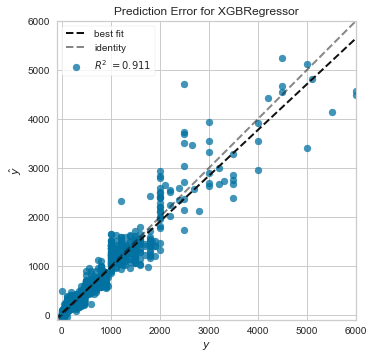

In [101]:
#Fit the training data to the visualizer and evaluate the model on the test data
visualizer = PredictionError(XGB_model)

#Fit the training data to the visualizer and evaluate the model on the test data
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof() 
plt.show()

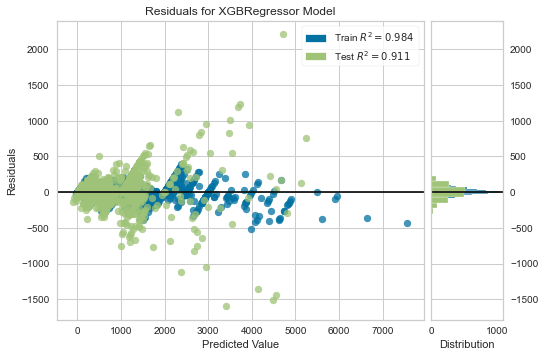

In [102]:
#Residual for Linear model
visualizer = ResidualsPlot(XGB_model)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()
plt.show()

# Model Building (Classification)

In [103]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


# Spliting Dataset into X and Y

In [104]:
x = df.drop('Price range', axis = 1)
y = df['Price range']

In [105]:
x.shape

(9362, 19)

In [106]:
y.shape

(9362,)

# Standardization

In [107]:
#Scaling x data using Standard scaler
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [108]:
x.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.046028,2.546808,-0.234817,1.608777,-1.556831,1.377696,-1.034966,-0.135805,0.896729,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.429678,-2.022410,-0.451916,0.977930,0.859957
1,-0.223104,2.546808,-0.234817,0.584353,-0.216997,1.377371,-1.036033,0.235153,1.065981,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.231562,-2.022410,-0.451916,2.321890,0.859957
2,-0.352063,2.546808,-0.148206,0.050327,-1.121862,1.378405,-1.033513,1.322778,5.805034,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.165524,-1.343779,1.932324,0.764449,0.859957
3,0.493647,2.546808,-0.148206,1.610725,0.637068,1.378396,-1.033157,0.264286,1.573737,-4.331413,-0.364131,-0.586149,-0.060373,0.0,1.495717,-2.022410,-0.451916,1.225374,0.859957
4,0.874917,2.546808,-0.148206,1.610335,0.637068,1.378421,-1.033236,0.256517,1.573737,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.429678,-2.022410,-0.451916,0.565523,0.859957


# Multicollinearity

In [109]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.007752,Restaurant Name
1,47.203839,Country Code
2,1.081009,City
3,1.113230,Address
4,1.069018,Locality
5,5.029660,Longitude
6,3.036560,Latitude
7,1.042189,Cuisines
8,1.829247,Average Cost for two
9,1.296530,Currency


In [110]:
#Droping Country and Switch to order menu
x = x.drop(columns = ['Country', 'Switch to order menu'], axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.007666,Restaurant Name
1,2.784131,Country Code
2,1.077240,City
3,1.105240,Address
4,1.068064,Locality
5,2.543452,Longitude
6,1.087835,Latitude
7,1.042143,Cuisines
8,1.825875,Average Cost for two
9,1.292380,Currency


* Multi collinearity issue has been resolved.

# Will remove skewness using Power Transformer

In [111]:
x.skew()

Restaurant Name          0.047817
Country Code             3.073330
City                    -1.208515
Address                 -0.046651
Locality                -0.267053
Longitude               -2.804979
Latitude                -3.124155
Cuisines                -0.305801
Average Cost for two     3.619524
Currency                 2.885278
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Aggregate rating        -0.940907
Rating color             0.047268
Rating text              0.434638
Votes                    3.216882
dtype: float64

In [112]:
#Will remove remaining skewness by using Power Tranform
x = PT.fit_transform(x)
x = pd.DataFrame(x)
x.columns = x.columns

In [113]:
x.skew()

0      0.010186
1      2.836312
2      0.532634
3     -0.007737
4     -0.037826
5      2.219168
6      1.349365
7     -0.060454
8      0.072889
9     -0.164795
10     2.382516
11     1.120081
12    16.505874
13    -0.080241
14    -0.022619
15     0.147742
16     0.620989
dtype: float64

# Oversampling

In [114]:
#Will balance out the data using SMOTE
smt = SMOTE()

In [115]:
x, y = smt.fit_resample(x, y)

In [116]:
y.value_counts()

3    4437
4    4437
2    4437
1    4437
Name: Price range, dtype: int64

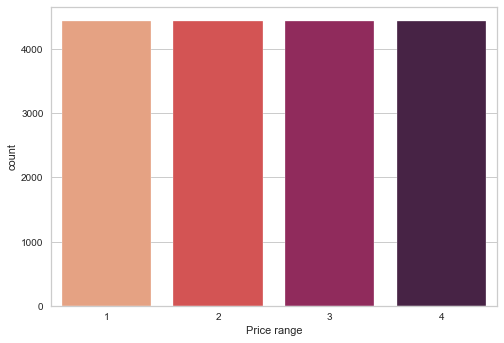

In [117]:
#Visualizing balanced dataset
sns.countplot(y, palette = 'rocket_r')
plt.show()

* Dataset have been balanced out now.

# PCA to remove curse of dimentionality

In [120]:
pca = PCA()
principle_comp = pca.fit_transform(x)

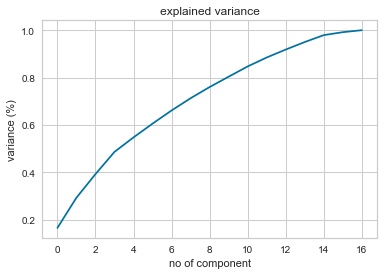

In [121]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

* Graph shows 14 components has explained 98% - 99% variance of all features, so will use 14.

In [123]:
pca = PCA(n_components = 14)

In [124]:
x = pca.fit_transform(x)

In [125]:
x

array([[ 1.26944483,  3.69686595, -5.49300441, ..., -0.29054456,
         1.78674658, -1.6991219 ],
       [ 1.2016948 ,  3.4808996 , -5.45926796, ...,  0.48034066,
         1.10200913, -0.48292846],
       [ 0.73273872,  3.88169717, -5.55109305, ...,  2.03458546,
         0.8798291 , -1.13259908],
       ...,
       [ 1.8186676 ,  2.00729215,  3.22601562, ..., -1.58686582,
         0.28848238,  0.3905553 ],
       [-2.78547371,  1.48153557, -1.03951972, ...,  0.90486333,
         0.51022257,  0.18550485],
       [ 1.01851754,  1.81895531, -1.20501923, ...,  1.0435847 ,
        -1.92767453, -0.43823753]])

In [126]:
#Find best Random_state
maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6701408450704225 on Random State = 75


In [127]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 75)

In [132]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model]

In [133]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 67.01408450704224
Confusion Matrix of  LogisticRegression()  is 
 [[707 150  13   5]
 [143 582  90  65]
 [  8 131 495 258]
 [  5  62 241 595]]
              precision    recall  f1-score   support

           1       0.82      0.81      0.81       875
           2       0.63      0.66      0.64       880
           3       0.59      0.55      0.57       892
           4       0.64      0.66      0.65       903

    accuracy                           0.67      3550
   macro avg       0.67      0.67      0.67      3550
weighted avg       0.67      0.67      0.67      3550

**************************************************
Accuracy_Score of  RidgeClassifier() is 59.04225352112677
Confusion Matrix of  RidgeClassifier()  is 
 [[709 136  19  11]
 [391 334  72  83]
 [ 65  89 414 324]
 [ 56   8 200 639]]
              precision    recall  f1-score   support

           1       0.58      0.81      0.68       875
           2       0.59      0.38      

In [134]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 67.01408450704224
cross Validation accuracy score of  LogisticRegression()  is  64.53701141761815
**************************************************
Accuracy_Score of  RidgeClassifier() is 59.04225352112677
cross Validation accuracy score of  RidgeClassifier()  is  58.046170514209514
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 87.43661971830986
cross Validation accuracy score of  DecisionTreeClassifier()  is  85.89169573654948
**************************************************
Accuracy_Score of  SVC() is 91.88732394366197
cross Validation accuracy score of  SVC()  is  89.18773072359205
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 84.59154929577466
cross Validation accuracy score of  KNeighborsClassifier()  is  81.28290532147521
**************************************************
Accuracy_Score of  RandomForestClassifier() is 92.8732394366197

 * Random Forest Classifier is giving the best performance with 92% Accuracy and 89% Cross validation score.

# Hyper Tuning Random Forest Classifier

In [137]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[8,12,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15,18],
    'min_samples_leaf':[3,5,10],
    'min_samples_split':[3,5,10],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 15}


In [138]:
Tuned_RFR_model = grd.best_estimator_
Tuned_RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=15)

In [139]:
#Model Confidence/Accuracy
print('Accuracy_Score of Tuned Random Forest Model is', accuracy_score(y_test,Tuned_RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Tuned Random Forest model is ",cross_val_score(Tuned_RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() * 100)

Accuracy_Score of Tuned Random Forest Model is 91.5774647887324
Cross Validation accuracy score of Tuned Random Forest model is  87.92020446148291


# Saving Classification model

In [140]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('Price_model', 'wb'))

In [141]:
#Loading saved model
loaded_model = pickle.load(open('Price_model','rb'))

In [142]:
price = loaded_model.predict(x_test)
price

array([2, 3, 2, ..., 4, 3, 4], dtype=int64)

In [143]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
Price = pd.DataFrame({'Actual Price range': y_test, 'Predicted Price range': price})
Price.head()

,Actual Price range,Predicted Price range
3107,2,2
761,3,3
10217,2,2
12599,3,3
5385,2,2


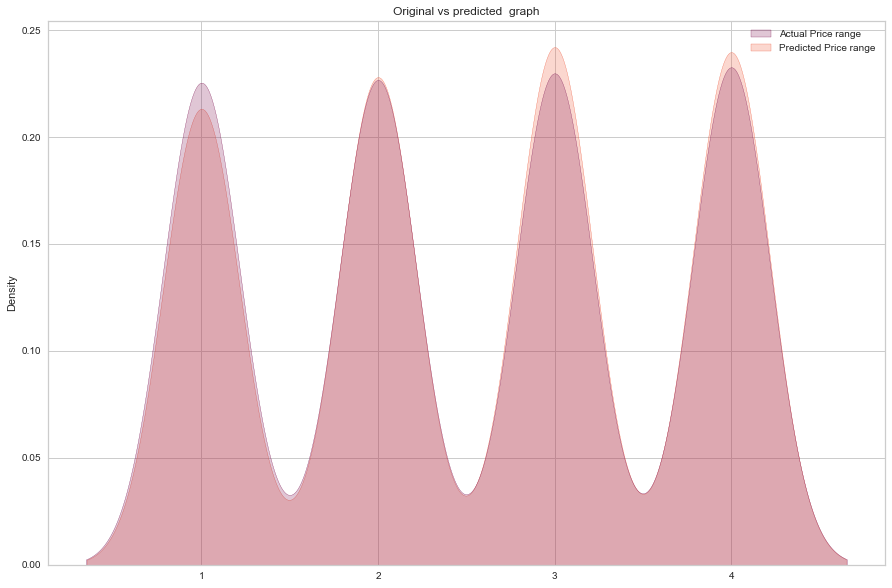

In [144]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = Price, palette = 'rocket', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()